In [358]:
#importing the pandas library
import pandas as pd
#importing the numpy library
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [359]:
df=pd.read_excel("D:/Users/aamathew/Desktop/Final Project/Interview dataset.xlsx","Sheet1")

In [360]:
print(df)

     Date of Interview              Client name         Industry   Location  \
0           13.02.2015                  Hospira  Pharmaceuticals    Chennai   
1           13.02.2015                  Hospira  Pharmaceuticals    Chennai   
2           13.02.2015                  Hospira  Pharmaceuticals    Chennai   
3           13.02.2015                  Hospira  Pharmaceuticals    Chennai   
4           13.02.2015                  Hospira  Pharmaceuticals    Chennai   
5           13.02.2015               Aon Hewitt      IT Services    Gurgaon   
6           13.02.2015               Aon Hewitt      IT Services    Gurgaon   
7           13.02.2015               Aon Hewitt      IT Services    Gurgaon   
8           13.02.2015               Aon Hewitt      IT Services    Gurgaon   
9           13.02.2015               Aon Hewitt      IT Services    Gurgaon   
10          19.06.2015                      UST      IT Services  Bangalore   
11          19.06.2015                      UST     

In [361]:
print(df.shape)
print(list(df.columns))

(1234, 23)
['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared', 'Expected Attendance', 'Observed Attendance', 'Marital Status']


In [362]:
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [363]:
df['Client name'].unique()

array(['Hospira', 'Aon Hewitt', 'UST', 'Standard Chartered Bank', 'ANZ',
       'Pfizer', 'Standard Chartered Bank Chennai', 'Aon hewitt Gurgaon',
       'Astrazeneca', 'Flextronics', 'Prodapt', 'Williams Lea',
       'Barclays', 'Hewitt', 'Woori Bank', '\ufeff\ufeff'], dtype=object)

In [364]:
df['Client name']=np.where(df['Client name'] =='Aon hewitt Gurgaon', 'Aon Hewitt', df['Client name'])

In [365]:
df['Client name'].unique()

array(['Hospira', 'Aon Hewitt', 'UST', 'Standard Chartered Bank', 'ANZ',
       'Pfizer', 'Standard Chartered Bank Chennai', 'Astrazeneca',
       'Flextronics', 'Prodapt', 'Williams Lea', 'Barclays', 'Hewitt',
       'Woori Bank', '\ufeff\ufeff'], dtype=object)

In [366]:
df['Client name']=np.where(df['Client name'] =='Aon Hewitt', 'Hewitt', df['Client name'])
df['Client name']=np.where(df['Client name'] =='Standard Chartered Bank Chennai', 'Standard Chartered Bank', df['Client name'])

#df['Client name']=np.where(df['Client name'] =='\ufeff\ufeff', '', df['Client name'])

In [367]:
df['Client name'].unique()

array(['Hospira', 'Hewitt', 'UST', 'Standard Chartered Bank', 'ANZ',
       'Pfizer', 'Astrazeneca', 'Flextronics', 'Prodapt', 'Williams Lea',
       'Barclays', 'Woori Bank', '\ufeff\ufeff'], dtype=object)

In [368]:
df['Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Gurgaonr',
       'Delhi', 'chennai', '- Cochin- ', 'Noida', 'CHENNAI', 'chennai ',
       nan], dtype=object)

In [369]:
df['Location']=np.where(df['Location'] =='Gurgaonr', 'Gurgaon', df['Location'])
df['Location']=np.where(df['Location'] =='chennai', 'Chennai', df['Location'])
df['Location']=np.where(df['Location'] =='CHENNAI', 'Chennai', df['Location'])
df['Location']=np.where(df['Location'] =='chennai ', 'Chennai', df['Location'])
df['Location']=np.where(df['Location'] =='- Cochin- ', 'Cochin', df['Location'])

In [370]:
df['Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'Cochin',
       'Noida', nan], dtype=object)

In [371]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'CDD KYC', 'Biosimiliars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Biosimilars', 'Regulatory',
       'Analytical R & D', 'Analytical R&D',
       'Senior software engineer-Mednet', 'Tech lead-Mednet',
       'Tech Lead- Mednet', 'Technical Lead', 'Sr Automation Testing',
       'TL', 'Senior Analyst', 'production', 'Production', 'Core Java',
       'Java J2EE', 'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java JSF', 'Java,J2ee, JSF',
       'Java ,J2ee', 'Java J

In [372]:
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Biosimiliars', 'Biosimilars', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='production', 'Production', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='CDD KYC', 'AML/KYC/CDD', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Analytical R&D', 'Analytical R & D', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Tech lead-Mednet', 'Technical Lead', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Tech Lead- Mednet', 'Technical Lead', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='TL', 'Technical Lead', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Core Java', 'Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java J2EE', 'Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java J2Ee', 'Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA/J2EE/Struts/Hibernate', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA/SPRING/HIBERNATE/JSF', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA JSF', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java,J2ee, JSF', 'Advanced Java', df['Nature of Skillset'])


In [373]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'Biosimilars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Regulatory', 'Analytical R & D',
       'Senior software engineer-Mednet', 'Technical Lead',
       'Sr Automation Testing', 'Senior Analyst', 'Production', 'Java',
       'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'Advanced Java', 'Java JSF', 'Java ,J2ee',
       'Java J2ee', '11.30 AM', '10.00 AM', '9.00 Am', '12.30 Pm',
       '9.30 AM', '11.30 Am', 'Java, J2Ee', 'Java,J2EE',
       'Java/J2ee/Core Java', 'Java/J2ee', 'JAVA, J2ee', 'JAVA,J2ee',
       'T-24 developer', 'COTS De

In [374]:
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java, J2Ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java ,J2ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java ,J2ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java,J2EE', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java/J2ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java/J2ee/Core Java', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java Tech Lead', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java, Spring, Hibernate', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java,spring,hibernate', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java, XML, Struts, hibernate', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA/J2EE', 'Advanced Java', df['Nature of Skillset'])


In [375]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'Biosimilars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Regulatory', 'Analytical R & D',
       'Senior software engineer-Mednet', 'Technical Lead',
       'Sr Automation Testing', 'Senior Analyst', 'Production', 'Java',
       'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'Advanced Java', 'Java JSF', 'Java J2ee',
       '11.30 AM', '10.00 AM', '9.00 Am', '12.30 Pm', '9.30 AM',
       '11.30 Am', 'JAVA, J2ee', 'JAVA,J2ee', 'T-24 developer',
       'COTS Developer', 'Product Control', 'Dot Net', 'COTS', 'testing',
       '- SAPBO, Informat

In [376]:
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java JSF', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java J2ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA, J2ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA,J2ee', 'Advanced Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java ', 'Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java,SQL', 'Java - SQL', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java, SQL', 'Java - SQL', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java,SQL', 'Java - SQL', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='SCCM-(Network, sharepoint,ms exchange)', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='SCCm- Desktop support', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Sccm- networking', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='sccm', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='SCCM – SQL', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='SCCM – Sharepoint', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Production Support - SCCM', 'SCCM', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='11.30 AM', 'NaN', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='10.00 AM', 'NaN', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='9.00 Am', 'NaN', df['Nature of Skillset'])

In [377]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'Biosimilars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Regulatory', 'Analytical R & D',
       'Senior software engineer-Mednet', 'Technical Lead',
       'Sr Automation Testing', 'Senior Analyst', 'Production', 'Java',
       'Oracle Plsql', 'Java - SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'Advanced Java', 'NaN', '12.30 Pm',
       '9.30 AM', '11.30 Am', 'T-24 developer', 'COTS Developer',
       'Product Control', 'Dot Net', 'COTS', 'testing',
       '- SAPBO, Informatica', 'ETL', 'Java-SAS', 'Manager', 'JAVA,SQL',
       'Hadoop', 'SCCM', 'SAS', 'Base

In [378]:
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='12.30 Pm', 'NaN', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='9.30 AM', 'NaN', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='11.30 Am', 'NaN', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='JAVA,SQL', 'Java - SQL', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java Developer', 'Java', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Automation Testing Java', 'Sr Automation Testing', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='nan', 'NaN', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Lending & Liability', 'Lending and Liabilities', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Lending And Liabilities', 'Lending and Liabilities', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Lending&Liablities', 'Lending and Liabilities', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='L & L', 'Lending and Liabilities', df['Nature of Skillset'])

In [379]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'Biosimilars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Regulatory', 'Analytical R & D',
       'Senior software engineer-Mednet', 'Technical Lead',
       'Sr Automation Testing', 'Senior Analyst', 'Production', 'Java',
       'Oracle Plsql', 'Java - SQL', 'Submission Management',
       'Biosimillar', 'Publishing', 'Global Labelling', 'ALS Testing',
       'Lending and Liabilities', 'Banking operations', 'Advanced Java',
       'NaN', 'T-24 developer', 'COTS Developer', 'Product Control',
       'Dot Net', 'COTS', 'testing', '- SAPBO, Informatica', 'ETL',
       'Java-SAS', 'Manager', 'Hadoop', 'SCCM', 'SAS',
       'BaseSAS Program/ Reporting', nan], dtype=object)

In [380]:
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Biosimillar', 'Biosimilars', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='Java-SAS', 'SAS', df['Nature of Skillset'])
df['Nature of Skillset']=np.where(df['Nature of Skillset'] =='BaseSAS Program/ Reporting', 'SAS', df['Nature of Skillset'])

In [381]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'Biosimilars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Regulatory', 'Analytical R & D',
       'Senior software engineer-Mednet', 'Technical Lead',
       'Sr Automation Testing', 'Senior Analyst', 'Production', 'Java',
       'Oracle Plsql', 'Java - SQL', 'Submission Management',
       'Publishing', 'Global Labelling', 'ALS Testing',
       'Lending and Liabilities', 'Banking operations', 'Advanced Java',
       'NaN', 'T-24 developer', 'COTS Developer', 'Product Control',
       'Dot Net', 'COTS', 'testing', '- SAPBO, Informatica', 'ETL', 'SAS',
       'Manager', 'Hadoop', 'SCCM', nan], dtype=object)

In [382]:
df['Interview Type'].unique()

array(['Scheduled Walkin', 'Scheduled ', 'Walkin', 'Scheduled Walk In',
       'Sceduled walkin', 'Walkin ', nan], dtype=object)

In [383]:
df['Interview Type']=np.where(df['Interview Type'] =='Scheduled Walkin', 'Scheduled Walk In', df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type'] =='Sceduled walkin', 'Scheduled Walk In', df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type'] =='Walkin ', 'Walkin', df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type'] =='Scheduled ', 'Scheduled', df['Interview Type'])

In [384]:
df['Interview Type'].unique()

array(['Scheduled Walk In', 'Scheduled', 'Walkin', nan], dtype=object)

In [385]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [386]:
df['Candidate Current Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'chennai',
       '- Cochin- ', 'Noida', 'CHENNAI', 'chennai ', nan], dtype=object)

In [387]:
df['Candidate Current Location']=np.where(df['Candidate Current Location'] =='chennai', 'Chennai', df['Candidate Current Location'])
df['Candidate Current Location']=np.where(df['Candidate Current Location'] =='- Cochin- ', 'Cochin', df['Candidate Current Location'])
df['Candidate Current Location']=np.where(df['Candidate Current Location'] =='chennai ', 'Chennai', df['Candidate Current Location'])
df['Candidate Current Location']=np.where(df['Candidate Current Location'] =='CHENNAI', 'Chennai', df['Candidate Current Location'])

In [388]:
df['Candidate Current Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'Cochin',
       'Noida', nan], dtype=object)

In [389]:
df['Candidate Job Location'].unique()

array(['Hosur', 'Bangalore', 'Chennai', 'Gurgaon', 'Visakapatinam',
       '- Cochin- ', 'Noida', nan], dtype=object)

In [390]:
df['Candidate Job Location']=np.where(df['Candidate Job Location'] =='- Cochin- ', 'Cochin', df['Candidate Job Location'])


In [391]:
df['Candidate Job Location'].unique()

array(['Hosur', 'Bangalore', 'Chennai', 'Gurgaon', 'Visakapatinam',
       'Cochin', 'Noida', nan], dtype=object)

In [392]:
df['Interview Venue'].unique()

array(['Hosur', 'Gurgaon', 'Bangalore', 'Chennai', 'Hyderabad',
       '- Cochin- ', 'Noida', nan], dtype=object)

In [393]:
df['Interview Venue']=np.where(df['Interview Venue'] =='- Cochin- ', 'Cochin', df['Interview Venue'])


In [394]:
df['Interview Venue'].unique()

array(['Hosur', 'Gurgaon', 'Bangalore', 'Chennai', 'Hyderabad', 'Cochin',
       'Noida', nan], dtype=object)

In [395]:
df['Candidate Native location'].unique()


array(['Hosur', 'Trichy', 'Chennai', 'Gurgaon', 'Noida', 'Delhi /NCR',
       'Cochin', 'Trivandrum', 'Bangalore', 'Coimbatore', 'Salem',
       'Tanjore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Allahabad',
       'Panjim', 'Cuttack', 'Visakapatinam', 'Belgaum', 'Patna',
       'Chitoor', 'Anantapur', 'Warangal', 'Ahmedabad', 'Kurnool',
       'Vijayawada', 'Vellore', 'Pondicherry', 'Nagercoil', 'Agra',
       'Bhubaneshwar', 'Ghaziabad', 'Baddi', 'Tuticorin', 'Tirupati',
       'Faizabad', 'Ambur', 'Chandigarh', 'Mysore', 'Hissar', 'Delhi',
       'Kanpur', 'Lucknow', '- Cochin- ', nan], dtype=object)

In [396]:
df['Candidate Native location']=np.where(df['Candidate Native location'] =='- Cochin- ', 'Cochin', df['Candidate Native location'])


In [397]:
df['Candidate Native location'].unique()

array(['Hosur', 'Trichy', 'Chennai', 'Gurgaon', 'Noida', 'Delhi /NCR',
       'Cochin', 'Trivandrum', 'Bangalore', 'Coimbatore', 'Salem',
       'Tanjore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Allahabad',
       'Panjim', 'Cuttack', 'Visakapatinam', 'Belgaum', 'Patna',
       'Chitoor', 'Anantapur', 'Warangal', 'Ahmedabad', 'Kurnool',
       'Vijayawada', 'Vellore', 'Pondicherry', 'Nagercoil', 'Agra',
       'Bhubaneshwar', 'Ghaziabad', 'Baddi', 'Tuticorin', 'Tirupati',
       'Faizabad', 'Ambur', 'Chandigarh', 'Mysore', 'Hissar', 'Delhi',
       'Kanpur', 'Lucknow', nan], dtype=object)

In [398]:
df['Observed Attendance'].value_counts()

Yes     701
No      401
yes      81
NO       35
no        7
No        6
no        1
yes       1
Name: Observed Attendance, dtype: int64

In [399]:
df['Observed Attendance']=np.where(df['Observed Attendance'] =='yes', 'Yes', df['Observed Attendance'])
df['Observed Attendance']=np.where(df['Observed Attendance'] =='NO', 'No', df['Observed Attendance'])
df['Observed Attendance']=np.where(df['Observed Attendance'] =='no', 'No', df['Observed Attendance'])
df['Observed Attendance']=np.where(df['Observed Attendance'] =='No ', 'No', df['Observed Attendance'])
df['Observed Attendance']=np.where(df['Observed Attendance'] =='no ', 'No', df['Observed Attendance'])
df['Observed Attendance']=np.where(df['Observed Attendance'] =='yes ', 'Yes', df['Observed Attendance'])


In [400]:
df['Observed Attendance'].value_counts()

Yes    783
No     450
Name: Observed Attendance, dtype: int64

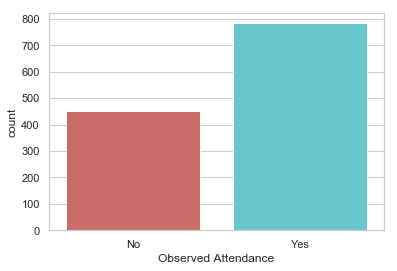

<Figure size 432x288 with 0 Axes>

In [401]:
sns.countplot(x=df['Observed Attendance'],palette='hls')
plt.show()
plt.savefig('count_plot')

In [402]:
df['Observed Attendance'].replace(('Yes', 'No'), (1, 0), inplace=True)
df['Observed Attendance'].value_counts()

1.0    783
0.0    450
Name: Observed Attendance, dtype: int64

In [403]:
df01 = df[pd.notnull(df['Observed Attendance'])]
df['Observed Attendance'].value_counts()

1.0    783
0.0    450
Name: Observed Attendance, dtype: int64

In [411]:
df.dropna(inplace=True)

In [413]:
df['Observed Attendance']=df['Observed Attendance'].astype(np.int64)
df['Observed Attendance'].value_counts()

1    676
0    308
Name: Observed Attendance, dtype: int64

In [414]:
count_no_interview_attended = len(df[df['Observed Attendance']==0])
count_interview_attended = len(df[df['Observed Attendance']==1])
pct_of_no_interview_attended = count_no_interview_attended/(count_no_interview_attended+count_interview_attended)
print("percentage of no attendance of interview is", round(pct_of_no_interview_attended*100,2))
pct_of_interview_attended = count_interview_attended/(count_no_interview_attended+count_interview_attended)
print("percentage of interview attended", round(pct_of_interview_attended*100,2))

percentage of no attendance of interview is 31.3
percentage of interview attended 68.7


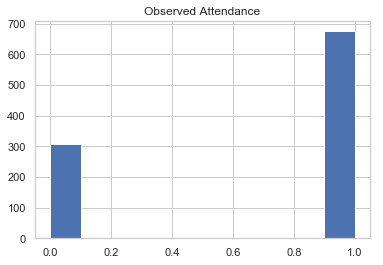

In [415]:
df.hist()
plt.show()

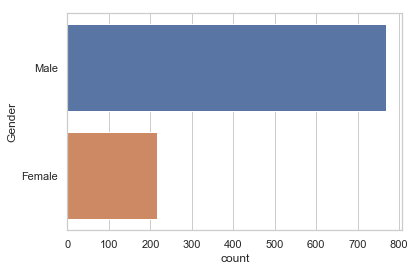

In [416]:
sns.countplot(y="Gender", data=df)
plt.show()

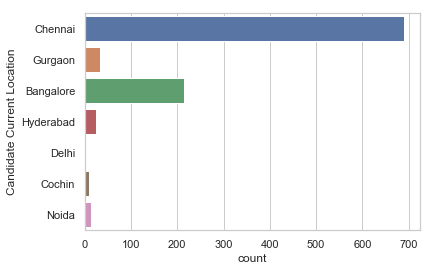

In [417]:
sns.countplot(y="Candidate Current Location", data=df)
plt.show()

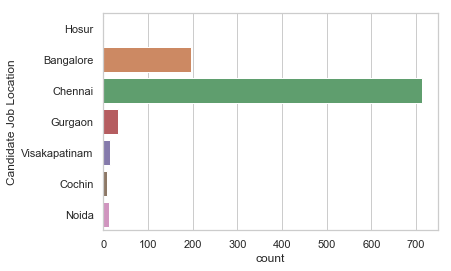

In [418]:
sns.countplot(y="Candidate Job Location", data=df)
plt.show()

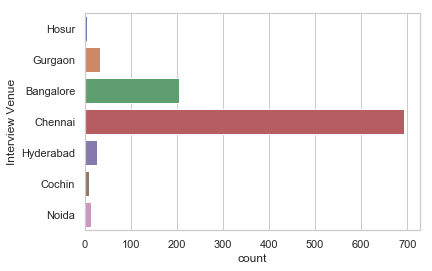

In [419]:
sns.countplot(y="Interview Venue", data=df)
plt.show()

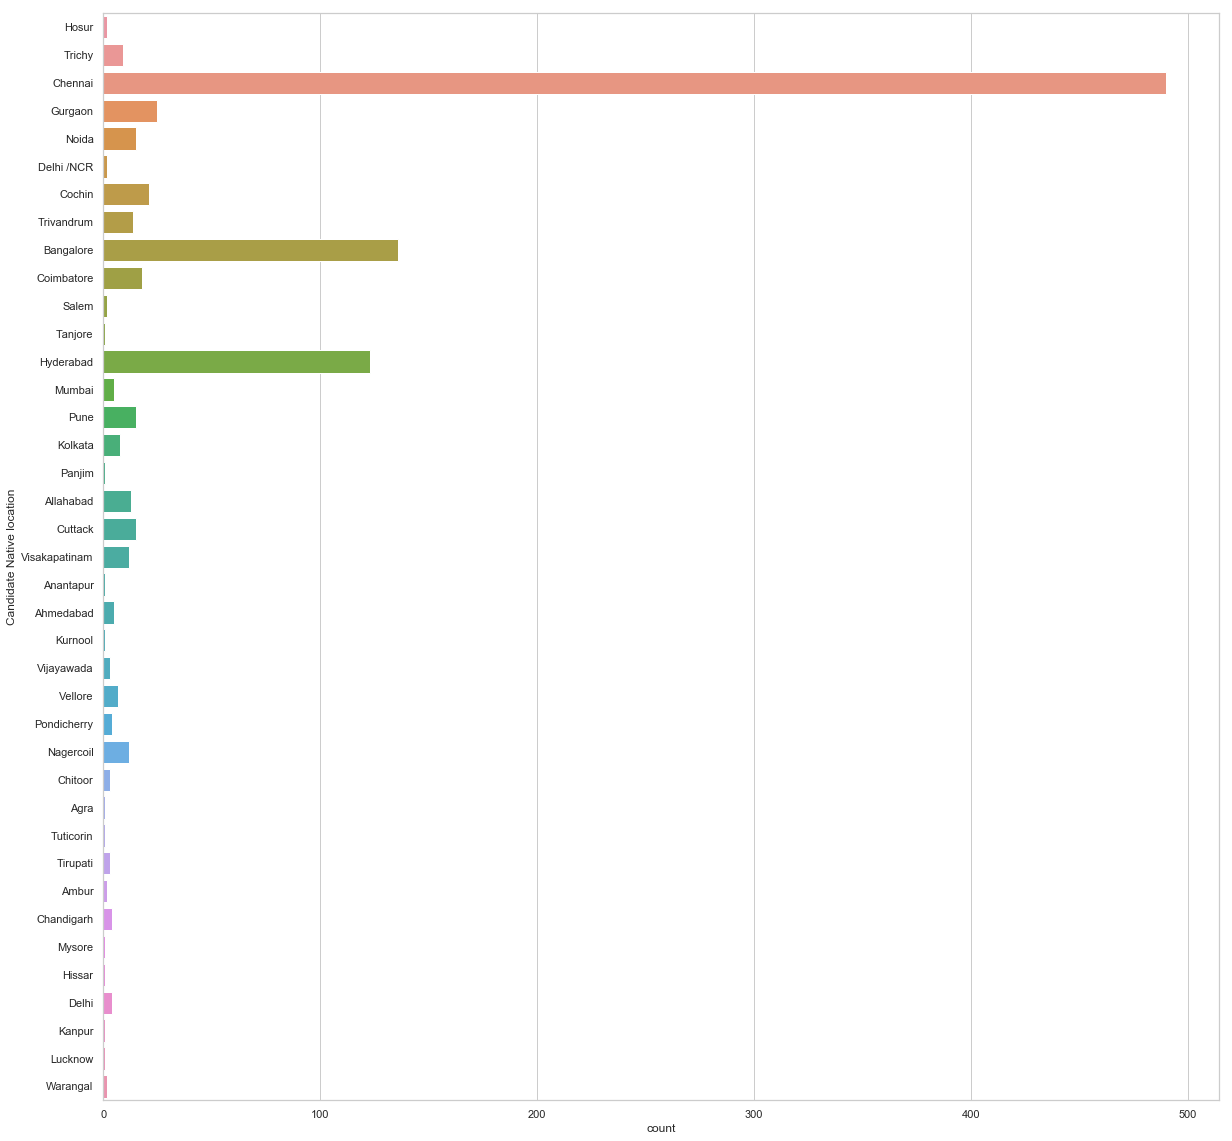

In [420]:
#adjusting the scale of a plot in seaborn
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
sns.countplot(y="Candidate Native location", data=df)
plt.show()

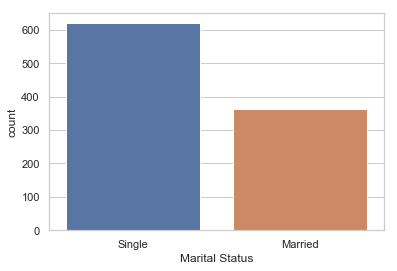

In [421]:
sns.countplot(x="Marital Status", data=df)
plt.show()

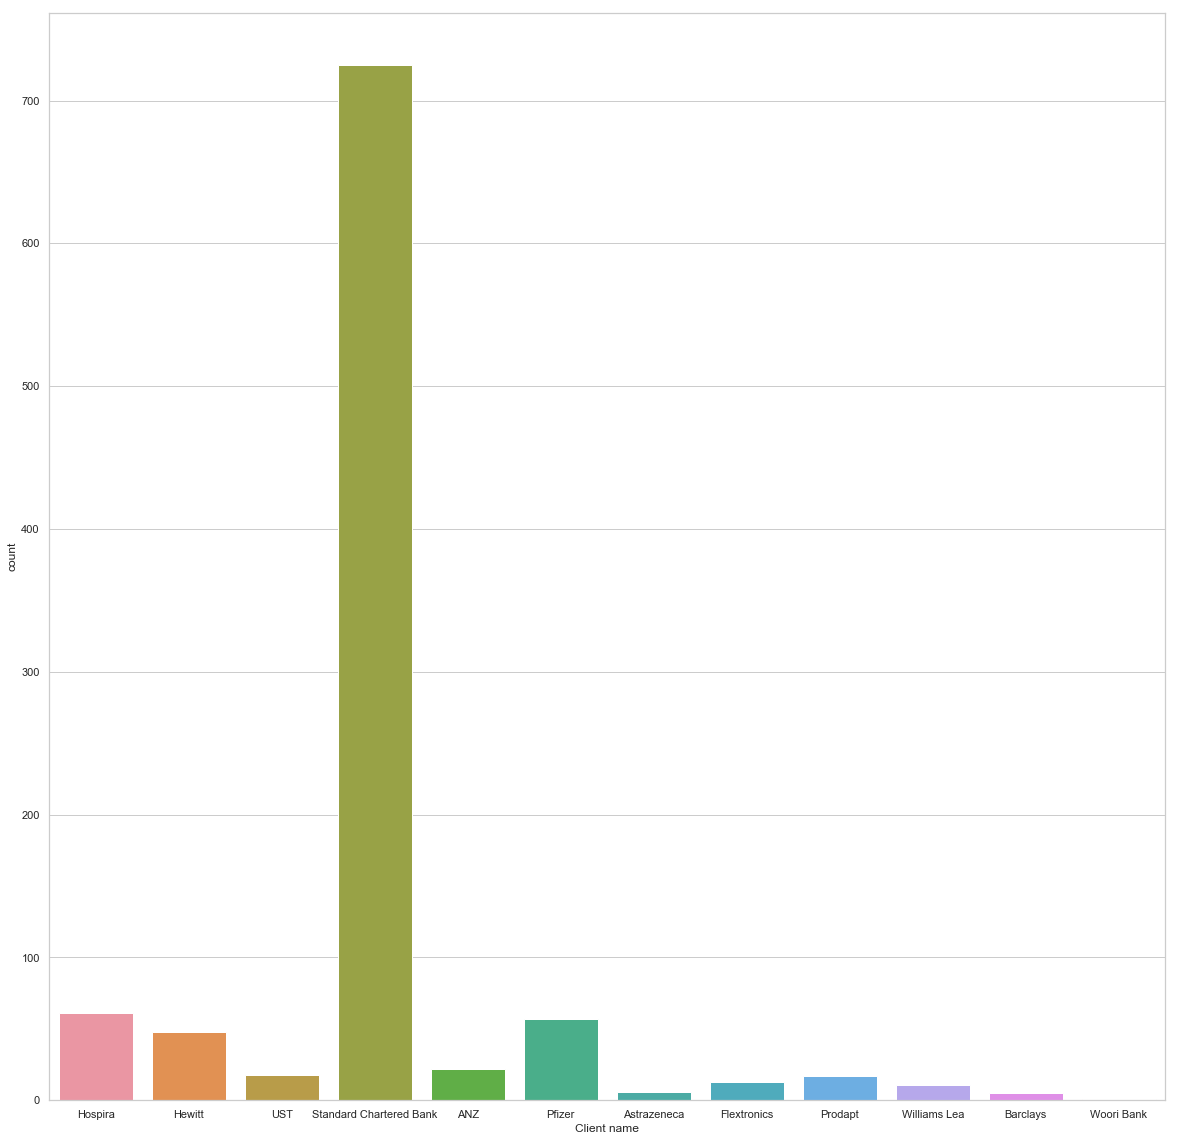

In [422]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
sns.countplot(x="Client name", data=df)
plt.show()

In [423]:
df['Have you obtained the necessary permission to start at the required time'].unique()

array(['Yes', 'No', 'Not yet', 'Yet to confirm', 'yes', 'Na'],
      dtype=object)

In [424]:
df['Have you obtained the necessary permission to start at the required time']=np.where(df['Have you obtained the necessary permission to start at the required time'] =='NO', 'No', df['Have you obtained the necessary permission to start at the required time'])
df['Have you obtained the necessary permission to start at the required time']=np.where(df['Have you obtained the necessary permission to start at the required time'] =='yes', 'Yes', df['Have you obtained the necessary permission to start at the required time'])
df['Have you obtained the necessary permission to start at the required time']=np.where(df['Have you obtained the necessary permission to start at the required time'] =='Not yet', 'No', df['Have you obtained the necessary permission to start at the required time'])
df['Have you obtained the necessary permission to start at the required time']=np.where(df['Have you obtained the necessary permission to start at the required time'] =='Yet to confirm', 'No', df['Have you obtained the necessary permission to start at the required time'])
df['Have you obtained the necessary permission to start at the required time']=np.where(df['Have you obtained the necessary permission to start at the required time'] =='Na', 'No', df['Have you obtained the necessary permission to start at the required time'])

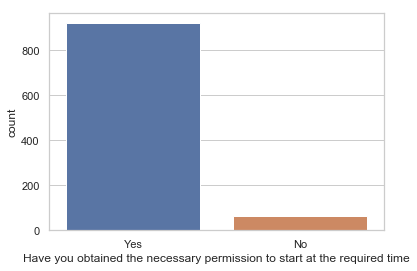

In [425]:
sns.countplot(x="Have you obtained the necessary permission to start at the required time", data=df)
plt.show()

In [426]:
df['Have you obtained the necessary permission to start at the required time'].value_counts()

Yes    921
No      63
Name: Have you obtained the necessary permission to start at the required time, dtype: int64

In [427]:
df['Hope there will be no unscheduled meetings'].unique()

array(['Yes', 'No', 'yes', 'Not Sure', 'cant Say', 'Na', 'Not sure'],
      dtype=object)

In [428]:
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='Na', 'No', df['Hope there will be no unscheduled meetings'])
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='nan', 'No', df['Hope there will be no unscheduled meetings'])
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='yes', 'Yes', df['Hope there will be no unscheduled meetings'])
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='Not sure', 'No', df['Hope there will be no unscheduled meetings'])
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='Not Sure', 'No', df['Hope there will be no unscheduled meetings'])
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='cant Say', 'No', df['Hope there will be no unscheduled meetings'])
df['Hope there will be no unscheduled meetings']=np.where(df['Hope there will be no unscheduled meetings'] =='NaN', 'No', df['Hope there will be no unscheduled meetings'])


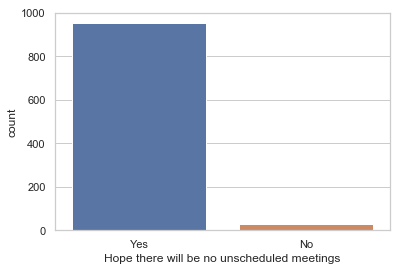

In [429]:
sns.countplot(x="Hope there will be no unscheduled meetings", data=df)
plt.show()

In [430]:
df['Hope there will be no unscheduled meetings'].value_counts()

Yes    953
No      31
Name: Hope there will be no unscheduled meetings, dtype: int64

In [431]:
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].unique()

array(['Yes', 'No', 'No Dont', 'yes', 'Na'], dtype=object)

In [432]:
df['Can I Call you three hours before the interview and follow up on your attendance for the interview']=np.where(df['Can I Call you three hours before the interview and follow up on your attendance for the interview'] =='Na', 'No', df['Can I Call you three hours before the interview and follow up on your attendance for the interview'])
df['Can I Call you three hours before the interview and follow up on your attendance for the interview']=np.where(df['Can I Call you three hours before the interview and follow up on your attendance for the interview'] =='No Dont', 'No', df['Can I Call you three hours before the interview and follow up on your attendance for the interview'])
df['Can I Call you three hours before the interview and follow up on your attendance for the interview']=np.where(df['Can I Call you three hours before the interview and follow up on your attendance for the interview'] =='yes', 'Yes', df['Can I Call you three hours before the interview and follow up on your attendance for the interview'])


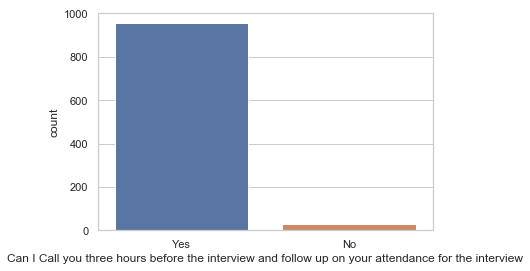

In [433]:
sns.countplot(x="Can I Call you three hours before the interview and follow up on your attendance for the interview", data=df)
plt.show()

In [434]:
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].value_counts()

Yes    955
No      29
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: int64

In [435]:
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].unique()

array(['Yes', 'No', 'No I have only thi number', 'yes', 'Na'],
      dtype=object)

In [437]:
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much']=np.where(df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'] =='yes', 'Yes', df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'])
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much']=np.where(df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'] =='No I have only thi number', 'No', df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'])
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much']=np.where(df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'] =='na', 'No', df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'])
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much']=np.where(df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'] =='Na', 'No', df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'])


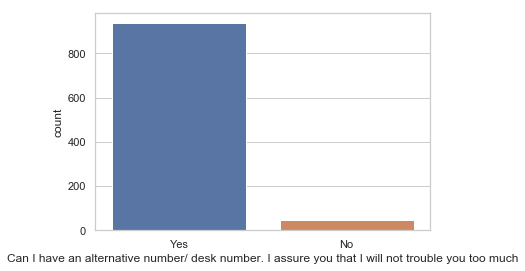

In [438]:
sns.countplot(x="Can I have an alternative number/ desk number. I assure you that I will not trouble you too much", data=df)
plt.show()

In [439]:
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].value_counts()

Yes    937
No      47
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble you too much, dtype: int64

In [440]:
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].unique()

array(['Yes', 'No', 'No- will take it soon', 'Not yet', 'yes', 'Na',
       'Not Yet'], dtype=object)

In [441]:
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=np.where(df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=='yes','Yes',df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'])
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=np.where(df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=='No- will take it soon','No',df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'])
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=np.where(df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=='na','No',df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'])
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=np.where(df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=='Na','No',df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'])
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=np.where(df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=='Not yet','No',df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'])
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=np.where(df['Have you taken a printout of your updated resume. Have you read the JD and understood the same']=='Not Yet','No',df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'])


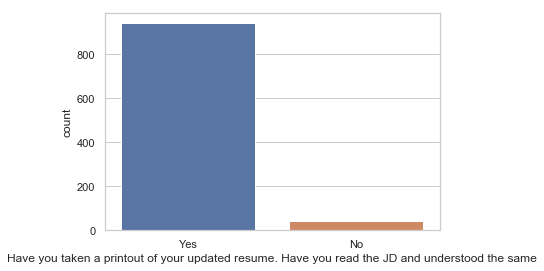

In [442]:
sns.countplot(x="Have you taken a printout of your updated resume. Have you read the JD and understood the same", data=df)
plt.show()

In [443]:
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].value_counts()

Yes    942
No      42
Name: Have you taken a printout of your updated resume. Have you read the JD and understood the same, dtype: int64

In [444]:
df['Are you clear with the venue details and the landmark.'].unique()

array(['Yes', 'No', 'No- I need to check', 'yes', 'Na', 'no'],
      dtype=object)

In [445]:
df['Are you clear with the venue details and the landmark.']=np.where(df['Are you clear with the venue details and the landmark.']=='No- I need to check','No',df['Are you clear with the venue details and the landmark.'])
df['Are you clear with the venue details and the landmark.']=np.where(df['Are you clear with the venue details and the landmark.']=='na','No',df['Are you clear with the venue details and the landmark.'])
df['Are you clear with the venue details and the landmark.']=np.where(df['Are you clear with the venue details and the landmark.']=='no','No',df['Are you clear with the venue details and the landmark.'])
df['Are you clear with the venue details and the landmark.']=np.where(df['Are you clear with the venue details and the landmark.']=='yes','Yes',df['Are you clear with the venue details and the landmark.'])
df['Are you clear with the venue details and the landmark.']=np.where(df['Are you clear with the venue details and the landmark.']=='Na','No',df['Are you clear with the venue details and the landmark.'])

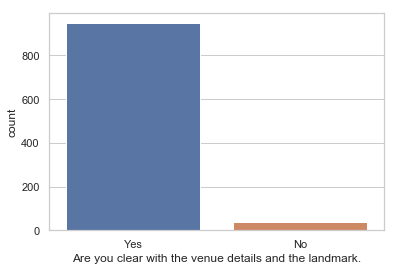

In [446]:
sns.countplot(x="Are you clear with the venue details and the landmark.", data=df)
plt.show()

In [447]:
df['Are you clear with the venue details and the landmark.'].value_counts()

Yes    948
No      36
Name: Are you clear with the venue details and the landmark., dtype: int64

In [448]:
df['Has the call letter been shared'].unique()

array(['Yes', 'Havent Checked', 'No', 'Need To Check', 'Not sure',
       'Not Sure', 'Not yet', 'no', 'yes', 'Na'], dtype=object)

In [449]:
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Havent Checked','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Need To Check','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Not sure','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Yet to Check','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Not Sure','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Not yet','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='no','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='na','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='yes','Yes',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='Na','No',df['Has the call letter been shared'])
df['Has the call letter been shared']=np.where(df['Has the call letter been shared']=='nan','No',df['Has the call letter been shared'])




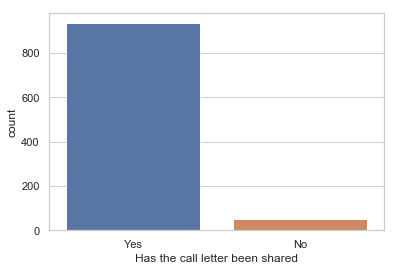

In [450]:
sns.countplot(df['Has the call letter been shared'], data=df)
plt.show()

In [451]:
df['Has the call letter been shared'].value_counts()

Yes    934
No      50
Name: Has the call letter been shared, dtype: int64

In [452]:
df['Expected Attendance'].unique()

array(['Yes', 'Uncertain', 'No', 'yes', '10.30 Am'], dtype=object)

In [453]:
df['Expected Attendance']=np.where(df['Expected Attendance']=='Uncertain','No',df['Expected Attendance'])
df['Expected Attendance']=np.where(df['Expected Attendance']=='NO','No',df['Expected Attendance'])
df['Expected Attendance']=np.where(df['Expected Attendance']=='yes','Yes',df['Expected Attendance'])
df['Expected Attendance']=np.where(df['Expected Attendance']=='10.30 Am','Yes',df['Expected Attendance'])
df['Expected Attendance']=np.where(df['Expected Attendance']== 'nan','No',df['Expected Attendance'])




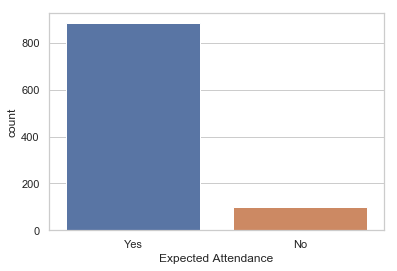

In [454]:
sns.countplot(df['Expected Attendance'], data=df)
plt.show()

In [455]:
df['Expected Attendance'].value_counts()

Yes    885
No      99
Name: Expected Attendance, dtype: int64

In [456]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#df.to_csv('D:/CleanedInterviews_final.csv', encoding='utf-8', index=False)

In [457]:
df['Client name'].value_counts()

Standard Chartered Bank    725
Hospira                     61
Pfizer                      57
Hewitt                      48
ANZ                         22
UST                         18
Prodapt                     17
Flextronics                 13
Williams Lea                11
Astrazeneca                  6
Barclays                     5
Woori Bank                   1
Name: Client name, dtype: int64

In [458]:
df['Marital Status'].value_counts()

Single     620
Married    364
Name: Marital Status, dtype: int64

In [459]:
df['Interview Type'].value_counts()

Scheduled Walk In    516
Scheduled            297
Walkin               171
Name: Interview Type, dtype: int64

In [460]:
df['Interview Type']=np.where(df['Interview Type']=='Scheduled Walk In','Scheduled',df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type']=='Scheduled Walkin','Scheduled',df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type']=='Sceduled walkin','Scheduled',df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type']=='Scheduled','Scheduled',df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type']=='Scheduled ','Scheduled',df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type']=='Walkin ','Non-Scheduled',df['Interview Type'])
df['Interview Type']=np.where(df['Interview Type']=='Walkin','Non-Scheduled',df['Interview Type'])

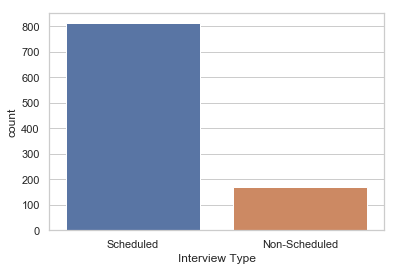

In [461]:
sns.countplot(df['Interview Type'], data=df)
plt.show()

In [463]:
df['Position to be closed'].value_counts()

Routine                807
Niche                  131
Dot Net                 18
Trade Finance           11
AML                      8
Selenium testing         5
Production- Sterile      4
Name: Position to be closed, dtype: int64

In [464]:
df['Position to be closed']=np.where(df['Position to be closed']=='Trade Finance','Routine',df['Position to be closed'])
df['Position to be closed']=np.where(df['Position to be closed']=='Dot Net','Niche',df['Position to be closed'])
df['Position to be closed']=np.where(df['Position to be closed']=='Production- Sterile','Routine',df['Position to be closed'])
df['Position to be closed']=np.where(df['Position to be closed']=='AML','Niche',df['Position to be closed'])
df['Position to be closed']=np.where(df['Position to be closed']=='Selenium testing','Niche',df['Position to be closed'])

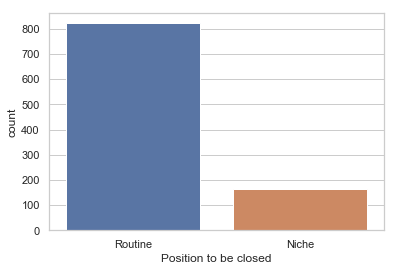

In [465]:
sns.countplot(df['Position to be closed'])
plt.show()

In [466]:
df['Industry'].value_counts()

BFSI                        753
Pharmaceuticals             124
IT Products and Services     43
IT Services                  23
Telecom                      17
Electronics                  13
IT                           11
Name: Industry, dtype: int64

In [467]:
df['Industry']=np.where(df['Industry']=='IT Products and Services','IT',df['Industry'])
df['Industry']=np.where(df['Industry']=='IT Services','IT',df['Industry'])

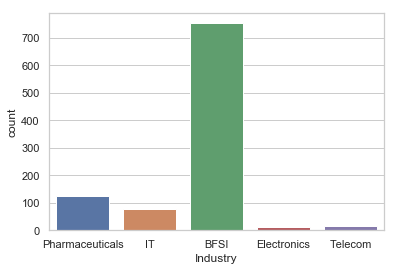

In [468]:
sns.countplot(df['Industry'])
plt.show()

In [478]:
df.to_csv('D:/CleanedInterviews_final.csv', encoding='utf-8', index=False)

In [479]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [480]:
df_data = df.dropna()

In [481]:
print(df_data.shape)

(984, 23)


In [482]:
df_data.drop(df_data.columns[0], axis=1, inplace=True)

In [483]:
print(df_data.shape)

(984, 22)


In [484]:
print(df_data)

                  Client name         Industry   Location  \
0                     Hospira  Pharmaceuticals    Chennai   
1                     Hospira  Pharmaceuticals    Chennai   
3                     Hospira  Pharmaceuticals    Chennai   
4                     Hospira  Pharmaceuticals    Chennai   
5                      Hewitt               IT    Gurgaon   
6                      Hewitt               IT    Gurgaon   
7                      Hewitt               IT    Gurgaon   
8                      Hewitt               IT    Gurgaon   
9                      Hewitt               IT    Gurgaon   
10                        UST               IT  Bangalore   
11                        UST               IT  Bangalore   
12                        UST               IT  Bangalore   
13                        UST               IT  Bangalore   
14                        UST               IT  Bangalore   
15                        UST               IT  Bangalore   
16                      

In [487]:
df_data = df_data.apply(LabelEncoder().fit_transform)
from sklearn.linear_model import LogisticRegression
Y_train=df_data['Observed Attendance']


In [489]:
X_train = df_data
df_data.head()

,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,5,3,1,1,31,1,0,1,1,4,...,1,1,1,1,1,1,1,1,0,1
1,5,3,1,1,31,1,317,1,1,0,...,1,1,1,1,1,1,1,1,0,1
3,5,3,1,1,31,1,467,1,1,1,...,1,1,0,1,0,1,1,0,0,1
4,5,3,1,1,31,1,544,1,1,0,...,1,1,1,0,1,1,1,0,0,0
5,4,2,4,0,31,1,615,1,4,3,...,1,1,1,1,1,1,1,1,1,1


In [491]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.35, random_state=42)

In [494]:
############################################################

# Logistic Regression implementation

############################################################
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
log=LogisticRegression()
result  = log.fit(X_train,y_train)
score = log.score(X_test, y_test)
print("Logistic Regression Score %2.3f" % score)

Logistic Regression Score 0.994
